Załadowanie bibliotek

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
%matplotlib inline
from matplotlib import pyplot as plt

#Ustalenie stylu wykresów jako ggplot
# plt.style.use('ggplot')
from sklearn import preprocessing
from sklearn import tree
import sklearn.metrics as metrics
from sklearn.model_selection import train_test_split
import pydotplus
from IPython.display import Image  


Wczytanie danych

In [2]:
# Ustalenie ścieżki do datasetu
filename_mushrooms = './agaricus-lepiota.csv'

# Wczytanie datasetu jako dataframe
mushrooms_dataframe = pd.read_csv(filename_mushrooms, sep=";")

# Wyświetlenie dataframe
display(mushrooms_dataframe)

classes cap-shape cap-surface cap-color bruises odor gill-attachment  \
0          p         x           s         n       t    p               f   
1          e         x           s         y       t    a               f   
2          e         b           s         w       t    l               f   
3          p         x           y         w       t    p               f   
4          e         x           s         g       f    n               f   
5          e         x           y         y       t    a               f   
6          e         b           s         w       t    a               f   
7          e         b           y         w       t    l               f   
8          p         x           y         w       t    p               f   
9          e         b           s         y       t    a               f   
10         e         x           y         y       t    l               f   
11         e         x           y         y       t    a               f   
12         e         b           s         y       t    a               f   
13         p         x           y         w       t    p               f   
14         e         x           f         n       f    n               f   
15         e         s           f         g       f    n               f   
16         e         f           f         w       f    n               f   
17         p         x           s         n       t    p               f   
18         p         x           y         w       t    p               f   
19         p         x           s         n       t    p               f   
20         e         b           s         y       t    a               f   
21         p         x           y         n       t    p               f   
22         e         b           y         y       t    l               f   
23         e         b           y         w       t    a               f   
24         e         b           s         w       t    l               f   
25         p         f           s         w       t    p               f   
26         e         x           y         y       t    a               f   
27         e         x           y         w       t    l               f   
28         e         f           f         n       f    n               f   
29         e         x           s         y       t    a               f   
...      ...       ...         ...       ...     ...  ...             ...   
8094       e         b           s         g       f    n               f   
8095       p         x           y         c       f    m               f   
8096       e         k           f         w       f    n               f   
8097       p         k           y         n       f    s               f   
8098       p         k           s         e       f    y               f   
8099       e         k           f         w       f    n               f   
8100       e         f           s         n       f    n               a   
8101       p         k           s         e       f    s               f   
8102       e         x           s         n       f    n               a   
8103       e         k           s         n       f    n               a   
8104       e         k           s         n       f    n               a   
8105       e         k           s         n       f    n               a   
8106       e         k           s         n       f    n               a   
8107       e         x           s         n       f    n               a   
8108       p         k           y         e       f    y               f   
8109       e         b           s         w       f    n               f   
8110       e         x           s         n       f    n               a   
8111       e         k           s         w       f    n               f   
8112       e         k           s         n       f    n               a   
8113       p         k           y         e       f    y               f   
8

Zbiór danych ma 8124 wiersze i 23 kolumny (pierwsza kolumna to atrybut decyzyjny, a pozostałe 22 kolumny to atrybuty warunkowe). W celu dalszego zbadania datasetu i weryfikacji typów danych kategorycznych w każdej kolumnie, wypisano unikalne wartości każdej kolumny. Sprawdzono również, czy zbiór danych zawiera brakujące wartości lub niepotrzebne kolumny.

In [3]:
print("Liczba różnych wartości atrybutów wraz z ich wartościami dla każdej kolumny:")
for x in mushrooms_dataframe.columns:
    x_unique = mushrooms_dataframe[x].unique()
    print("{:>25}: {:>2} {}".format(x, x_unique.shape[0], x_unique))

Liczba różnych wartości atrybutów wraz z ich wartościami dla każdej kolumny:
                  classes:  2 ['p' 'e']
                cap-shape:  6 ['x' 'b' 's' 'f' 'k' 'c']
              cap-surface:  4 ['s' 'y' 'f' 'g']
                cap-color: 10 ['n' 'y' 'w' 'g' 'e' 'p' 'b' 'u' 'c' 'r']
                  bruises:  2 ['t' 'f']
                     odor:  9 ['p' 'a' 'l' 'n' 'f' 'c' 'y' 's' 'm']
          gill-attachment:  2 ['f' 'a']
             gill-spacing:  2 ['c' 'w']
                gill-size:  2 ['n' 'b']
               gill-color: 12 ['k' 'n' 'g' 'p' 'w' 'h' 'u' 'e' 'b' 'r' 'y' 'o']
              stalk-shape:  2 ['e' 't']
               stalk-root:  5 ['e' 'c' 'b' 'r' '?']
 stalk-surface-above-ring:  4 ['s' 'f' 'k' 'y']
 stalk-surface-below-ring:  4 ['s' 'f' 'y' 'k']
   stalk-color-above-ring:  9 ['w' 'g' 'p' 'n' 'b' 'e' 'o' 'c' 'y']
   stalk-color-below-ring:  9 ['w' 'p' 'g' 'b' 'n' 'e' 'y' 'o' 'c']
                veil-type:  1 ['p']
               veil-color:  4 ['w' 'n' 

Zauważono, że spośród 22 atrybutów warunkowych, jedynie 'veil-type' zawiera tylko jedną wartość "p". Zatem atrybut ten nie zapewnia żadnej wartości dodanej do klasyfikatora. Podjęto decyzję o usunięciu tej kolumny - utworzono generyczny kod usuwający wszystkie kolumny zawierające jedną wartość.

In [4]:
print("Rozmiar mushrooms_dataframe przed usunięciem: ",mushrooms_dataframe.shape)     

# Usunięcie kolumn zawierających jedną wartośc
for col in mushrooms_dataframe.columns.values:
    col_unique = mushrooms_dataframe[col].unique()
    if len(col_unique) == 1:
        print("Usunięto kolumnę '{}',która zawiera tylko jedną wartość: {}".format(col, col_unique[0]))
        mushrooms_dataframe = mushrooms_dataframe.drop(col, 1)
        
print("Rozmiar mushrooms_dataframe po usunięciu: ",mushrooms_dataframe.shape)

Rozmiar mushrooms_dataframe przed usunięciem:  (8124, 23)
Usunięto kolumnę 'veil-type',która zawiera tylko jedną wartość: p
Rozmiar mushrooms_dataframe po usunięciu:  (8124, 22)


Stwierdzono również, że kolumna 'stalk-root' zawiera brakujące wartości. Zbadano udział brakujących wartości w zbiorze - utworzono generyczny kod badający udziały brakująych wartości.

Liczba obiektów w zależności od kategorii i ich udział procentowy dla klasy 'stalk-root':

   stalk-root    percent
b        3776  46.479567
?        2480  30.526834
e        1120  13.786312
c         556   6.843919
r         192   2.363368


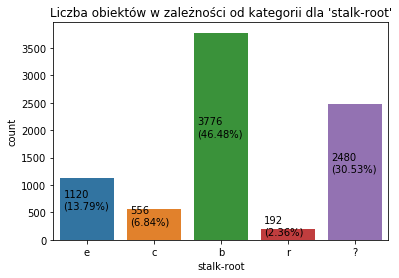

In [5]:
for x in mushrooms_dataframe.columns:
    x_unique = mushrooms_dataframe[x].unique()
    if '?' in x_unique:
        column = mushrooms_dataframe[x]
        column_count = column.count()
        column_value_count = column.value_counts()

        print("Liczba obiektów w zależności od kategorii i ich udział procentowy dla klasy '{}':\n".format(x))
        stat = column_value_count.to_frame()
        stat['percent'] = 100. * column_value_count / column_count
        print(stat)

        fig = plt.figure()
        fig.patch.set_facecolor('xkcd:white')
        ax = sns.countplot(x=x, data=mushrooms_dataframe)
        ax.set_title("Liczba obiektów w zależności od kategorii dla '{}'".format(x))
        
#         for p in ax.patches:
#             height = p.get_height()
#             ax.text(p.get_x()+0.25, height+ 3, 'n=%.0f'%(height))
        
        for p in ax.patches:
            ax.annotate('{:.0f}\n({:.2f}%)'.format(p.get_height(), 100. * p.get_height() / column_count), (p.get_x()+0.05, p.get_height()//2))
        plt.show()


Możliwe działania do podjęcia w pzypadku występowania brakujących danych to m.in. usunięcie kolumn lub wierszy zawierających brakujące dane, wypełninie brakujących wartości inną wartościa np. z poprzedniej lub następnej komórki. Stwierdzono, że udzial procentowy brakujących wartości ('?') dla atrybutu 'stalk-root' wynosi ponad 30,5%. Podjeto decyzję sporządzeniu dwóch wersji zbioru danych: z usuniętymi wierszami oraz z usuniętymi kolumnami zawierającymi brakujące wartości.

Utworzono generyczny kod oczyszczający zbiór danych z wierszy zawierających brakujące wartości:

In [6]:
# for x in mushrooms_dataframe.columns:
#     x_unique = mushrooms_dataframe[x].unique()
#     if '?' in x_unique:
#         print("Liczba wierszy w kolumnie '{}' zawierająca brakujące wartości: {}".format(x, mushrooms_dataframe[mushrooms_dataframe[x] == '?'].shape[0]))

# Wykonanie kopii danych
mushrooms_dataframe_dropped_rows = mushrooms_dataframe.copy(deep=True)

# Usunięcie wierszy
for x in mushrooms_dataframe_dropped_rows.columns:
    to_delete_count = mushrooms_dataframe_dropped_rows[mushrooms_dataframe_dropped_rows[x] == '?'].shape[0]
    if to_delete_count > 0:
        mushrooms_dataframe_dropped_rows = mushrooms_dataframe_dropped_rows[mushrooms_dataframe_dropped_rows[x] != '?']
        print("W kolumnie '{}' usunięto {} wierszy zawierających brakujące wartości.".format(x, to_delete_count))

print("mushrooms_dataframe_dropped_rows: ",mushrooms_dataframe_dropped_rows.shape)

print("\n Podział atrybutu decyzyjnego:")
print(mushrooms_dataframe_dropped_rows['classes'].value_counts())

W kolumnie 'stalk-root' usunięto 2480 wierszy zawierających brakujące wartości.
mushrooms_dataframe_dropped_rows:  (5644, 22)

 Podział atrybutu decyzyjnego:
e    3488
p    2156
Name: classes, dtype: int64


Utworzono generyczny kod oczyszczający zbiór danych z kolumn zawierających brakujące wartości powyżej zadanego progu procentowego (25%):

In [7]:
# Próg procentowy usuwania kolumn z brakującymi wartościami
drop_percentage = 0.25

# Wykonanie kopii danych
mushrooms_dataframe_dropped_cols = mushrooms_dataframe.copy(deep=True)

# Zastąpienie znaku ? wartością nan
for col in mushrooms_dataframe_dropped_cols:
    mushrooms_dataframe_dropped_cols.loc[mushrooms_dataframe_dropped_cols[col] == '?', col] = np.nan

# Usunięcie kolumn
for col in mushrooms_dataframe_dropped_cols.columns.values:
    no_rows = mushrooms_dataframe_dropped_cols[col].isnull().sum()
    percentage = no_rows / mushrooms_dataframe_dropped_cols.shape[0]
    if percentage >= drop_percentage:
        del mushrooms_dataframe_dropped_cols[col]
        print("Kolumna '{}' zawierająca {} brakujących wartości ({}% procent zbioru) została usunięta.".format(col, no_rows, percentage))
        
print("mushrooms_dataframe_dropped_cols: ",mushrooms_dataframe_dropped_rows.shape)

print("\n Podział atrybutu decyzyjnego:")
print(mushrooms_dataframe_dropped_cols['classes'].value_counts())

Kolumna 'stalk-root' zawierająca 2480 brakujących wartości (0.3052683407188577% procent zbioru) została usunięta.
mushrooms_dataframe_dropped_cols:  (5644, 22)

 Podział atrybutu decyzyjnego:
e    4208
p    3916
Name: classes, dtype: int64


Przed przystąpieniem do budowy drzewa decyzyjnego należy zakodować wartości atrybutów (kolumn). Do zakodowania wartości kategorycznych użyta zostanie technika kodowania etykiet, która konwertuje każdą wartość w kolumnie na liczbę.

In [33]:
print('Kodowanie danych z usuniętymi wierszami:')
labelencoder_rows = preprocessing.LabelEncoder()
for column in mushrooms_dataframe_dropped_rows.columns:
    mushrooms_dataframe_dropped_rows[column] = labelencoder_rows.fit_transform(mushrooms_dataframe_dropped_rows[column])

print("Liczba różnych wartości atrybutów wraz z ich wartościami dla każdej kolumny po zakodowaniu:")
for x in mushrooms_dataframe_dropped_rows.columns:
    x_unique = mushrooms_dataframe_dropped_rows[x].unique()
    print("{:>25}: {:>2} {}".format(x, x_unique.shape[0], x_unique))

print('\n\nKodowanie danych z usuniętymi kolumnami:')    
labelencoder_cols = preprocessing.LabelEncoder()
for column in mushrooms_dataframe_dropped_cols.columns:
    mushrooms_dataframe_dropped_cols[column] = labelencoder_cols.fit_transform(mushrooms_dataframe_dropped_cols[column])

print("Liczba różnych wartości atrybutów wraz z ich wartościami dla każdej kolumny po zakodowaniu:")
for x in mushrooms_dataframe_dropped_cols.columns:
    x_unique = mushrooms_dataframe_dropped_cols[x].unique()
    print("{:>25}: {:>2} {}".format(x, x_unique.shape[0], x_unique))

Kodowanie danych z usuniętymi wierszami:
Liczba różnych wartości atrybutów wraz z ich wartościami dla każdej kolumny po zakodowaniu:
                  classes:  2 [1 0]
                cap-shape:  6 [5 0 4 2 3 1]
              cap-surface:  4 [2 3 0 1]
                cap-color:  8 [4 7 6 3 2 5 0 1]
                  bruises:  2 [1 0]
                     odor:  7 [6 0 3 5 2 1 4]
          gill-attachment:  2 [1 0]
             gill-spacing:  2 [0 1]
                gill-size:  2 [1 0]
               gill-color:  9 [2 3 0 4 7 1 6 5 8]
              stalk-shape:  2 [0 1]
               stalk-root:  4 [2 1 0 3]
 stalk-surface-above-ring:  4 [2 0 1 3]
 stalk-surface-below-ring:  4 [2 0 3 1]
   stalk-color-above-ring:  7 [5 2 4 3 0 1 6]
   stalk-color-below-ring:  7 [5 4 2 0 3 1 6]
               veil-color:  2 [0 1]
              ring-number:  3 [1 2 0]
                ring-type:  4 [3 0 1 2]
        spore-print-color:  6 [1 2 4 0 3 5]
               population:  6 [3 2 0 4 5 1]
         

Mająć zakodowane dane, należy dokonać ich podziału na atrybuty warunkowe (zmienna X_\*) i decyzyjne (zmienna Y_\*).

In [150]:
X_dropped_rows = mushrooms_dataframe_dropped_rows.drop(['classes'], axis=1)
Y_dropped_rows = mushrooms_dataframe_dropped_rows['classes']

X_dropped_cols = mushrooms_dataframe_dropped_cols.drop(['classes'], axis=1)
Y_dropped_cols = mushrooms_dataframe_dropped_cols['classes']

Kolejnym podziałem, który należy wykonać, jest podział danych na część treningową i testową. Założono, że rozmiar części testowej będzie wynosił 33% wszystkich danych. W celu zachowania powtarzalności wyników parametr random_state ustawiono na wartość 30 (ustawienie innej wartości bedzie powodowąło wygnerowanie innego podziału danych i innego drzewa decyzyjnego).

In [151]:
random_state = 30

X_train_dr, X_test_dr ,Y_train_dr, Y_test_dr = train_test_split(X_dropped_rows, Y_dropped_rows, test_size = 0.33, random_state=random_state)

X_train_dc, X_test_dc ,Y_train_dc, Y_test_dc = train_test_split(X_dropped_cols, Y_dropped_cols, test_size = 0.33, random_state=random_state)

Utworzono funkcję sprawdzającą jakość klasyfikacji zbudowanego drzewa oraz funkcję budującą drzewo:

In [145]:
def test_tree(clf, X_train, X_test, Y_train, Y_test, print_res=True):
    clf       = clf.fit(X_train, Y_train)
    score     = clf.score(X_test, Y_test)
    precision = metrics.precision_score(Y_test, clf.predict(X_test))
    recall    = metrics.recall_score(Y_test, clf.predict(X_test))
    res = (score, precision,recall)
    if print_res:
        print("Accuracy = %f / Precision = %f / Recall = %f" % res)
    return res

def build_tree(X, X_train, X_test, Y_train, Y_test, random_state, **kwargs):
    clf = tree.DecisionTreeClassifier(**kwargs, random_state=random_state)
    clf = clf.fit(X_train, Y_train)

    dot_data = tree.export_graphviz(clf, out_file=None,  
                                    feature_names=X.columns, 
                                    class_names=['p','e'],
                                    filled=True, rounded=True,  
                                    special_characters=True)  
    graph = pydotplus.graph_from_dot_data(dot_data)  
    display(Image(graph.create_png()))
    
    test_tree(clf, X_train, X_test, Y_train, Y_test);
    
    return clf

def attribute_importance(clf, X):
    attrs = X.columns.values
    attr_importance = clf.feature_importances_
    sorted_attr_importance = np.argsort(attr_importance)
    range_sorted_attr_importance = range(len(sorted_attr_importance))
    
    plt.figure(figsize=(8, 7))
    plt.barh(range_sorted_attr_importance, attr_importance[sorted_attr_importance])
    plt.yticks(range_sorted_attr_importance, attrs[sorted_attr_importance])
    plt.xlabel('Importance')
    plt.title('Attribute importances')
    plt.draw()
    plt.show()

W oparciu o przygotowane dane zbudowano drzewa decyzyjne.

1. Dokonano klasyfikacji zbioru danych z usuniętymi wierszami, zawierającymi braki danych:

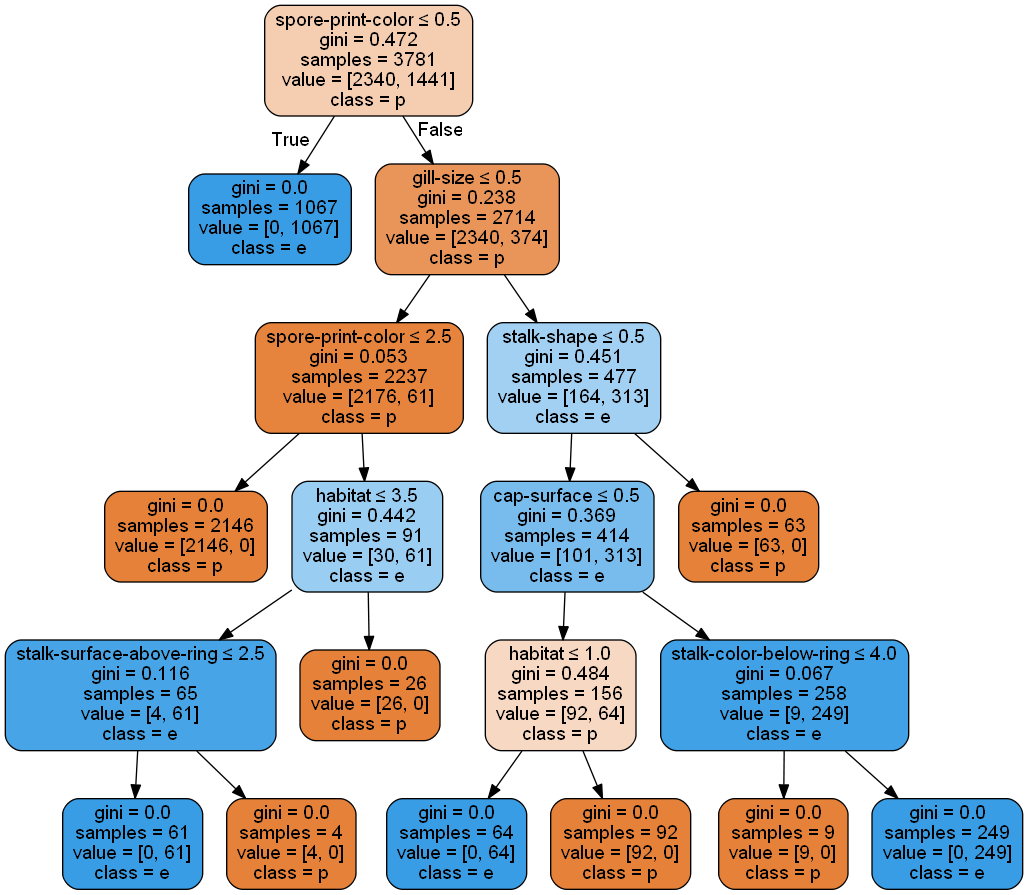

Accuracy = 1.000000 / Precision = 1.000000 / Recall = 1.000000


In [146]:
clf = build_tree(X_dropped_rows, X_train_dr, X_test_dr, Y_train_dr, Y_test_dr, random_state)

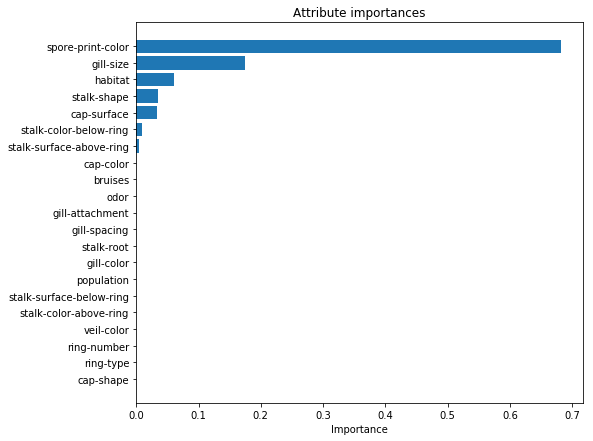

In [149]:
attribute_importance(clf, X_dropped_rows)

2. Dokonano klasyfikacji zbioru danych z usuniętymi kolumnami, zawierającymi braki danych:

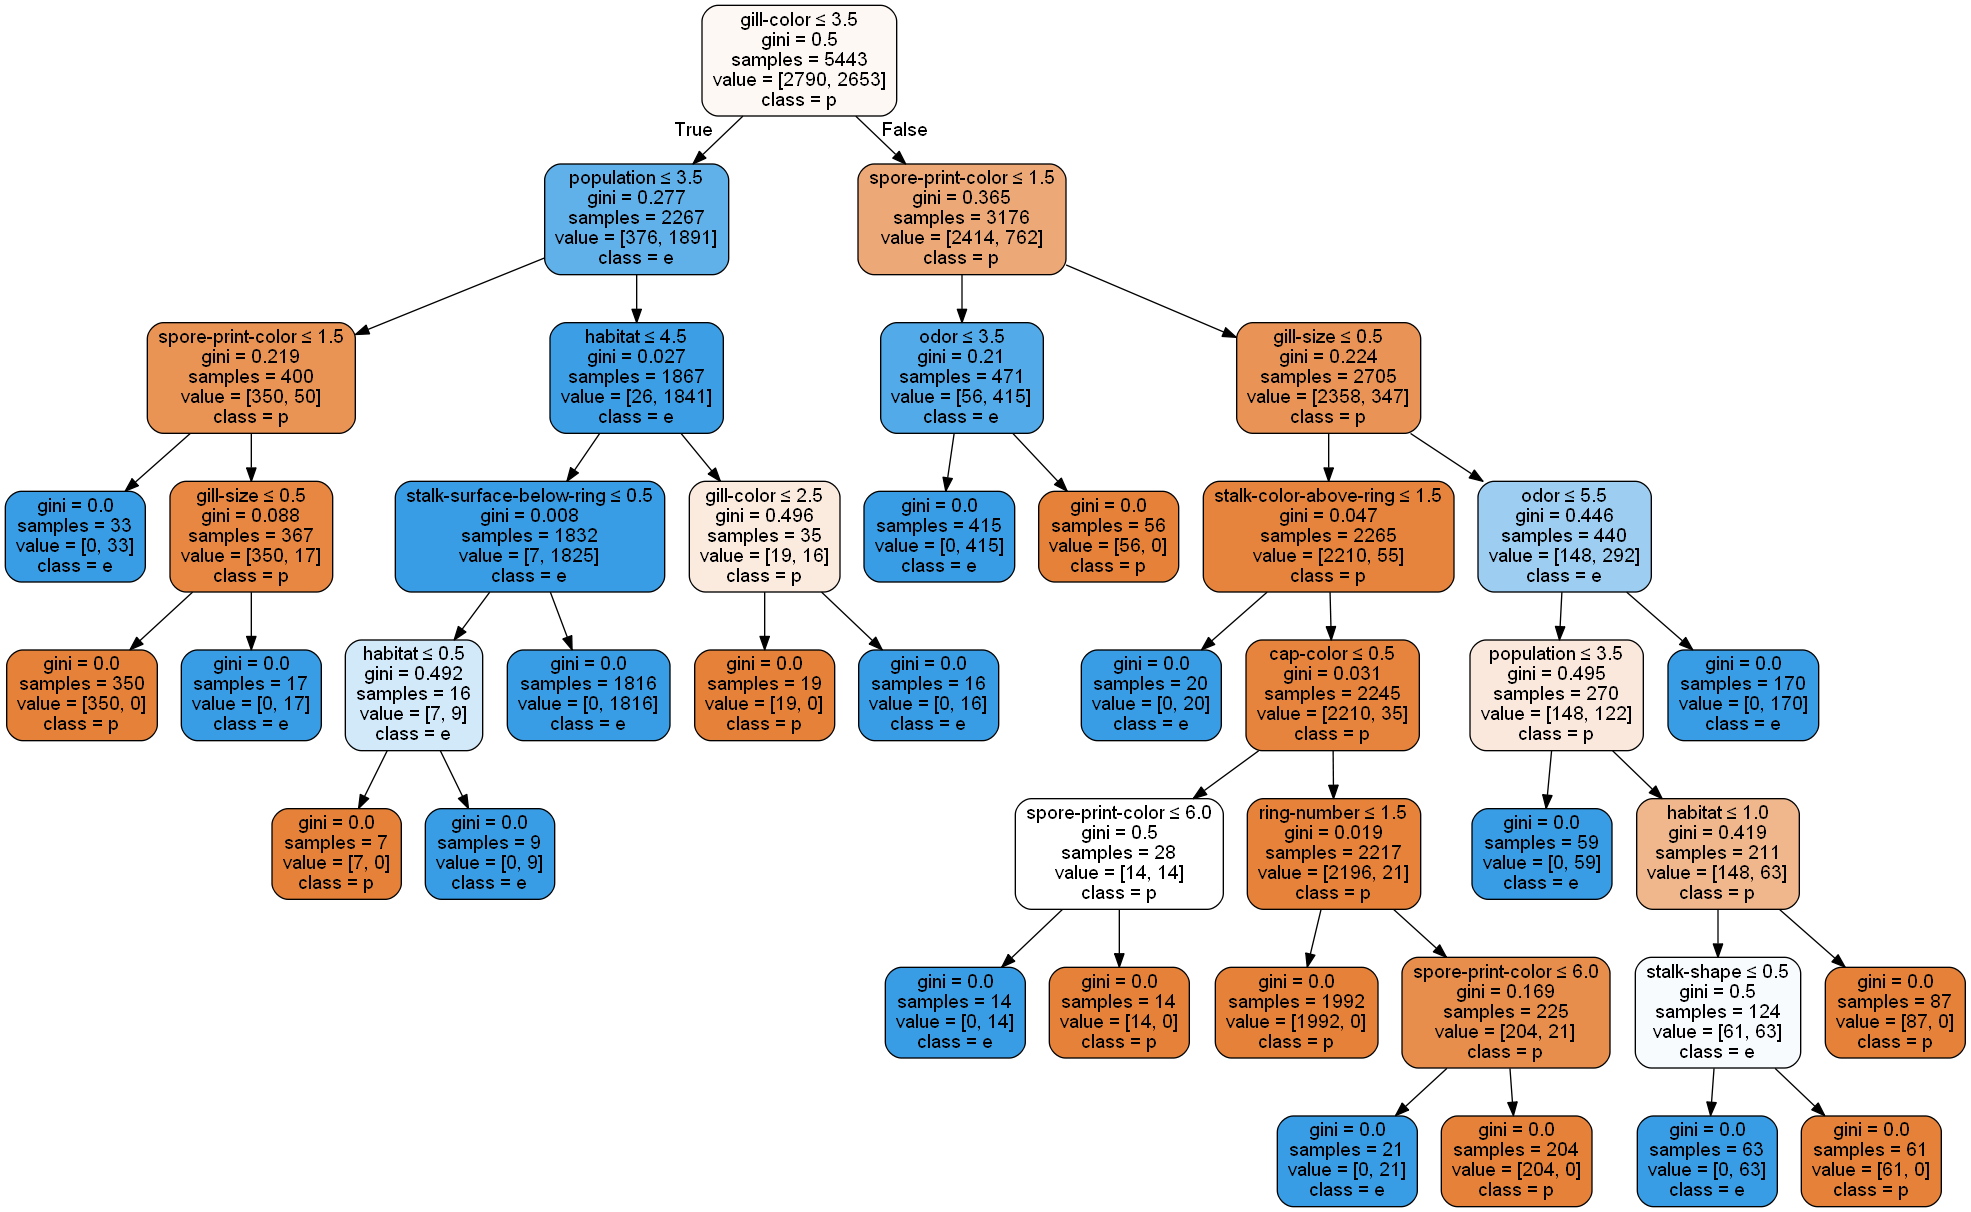

Accuracy = 1.000000 / Precision = 1.000000 / Recall = 1.000000


In [105]:
clf = build_tree(X_dropped_cols, X_train_dc, X_test_dc ,Y_train_dc, Y_test_dc, random_state)

IndexError: index 20 is out of bounds for axis 1 with size 20

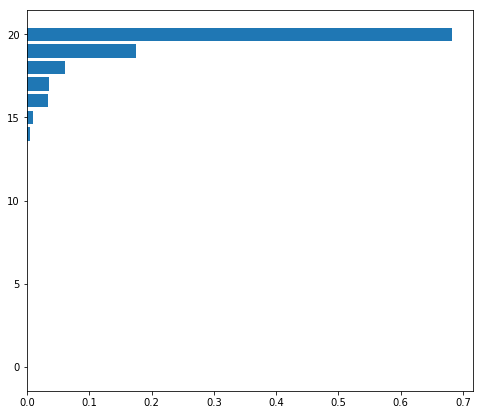

In [148]:
attribute_importance(clf, X_dropped_cols)

Zauważono, że drzewo wygenerowane przy użyciu danych z usuniętymi kolumnami jest bardziej rozbudowano niż drzewo wygenerowane przy użyciu danych z usuniętymi wierszami, ponieważ zostało ono skonstruowano przy użyciu zbioru o większej liczbie próbek. Do kolejnych eksperymentów użyte zostaną dane z usuniętymi kolumnami.